In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/content'

# 2.Loading the dataset

In [7]:
data=pd.read_csv(r"abalone.csv")

In [8]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [11]:
# Target Variable
data['Age'] = data.Rings + 1.5
data.drop('Rings', axis=1, inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [12]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight']
categorical_feature = "Sex"
features = numerical_features + [categorical_feature]
target = 'age'

In [13]:
data.shape

(4177, 9)

# 3.Data Visualization

# Univariate Analysis

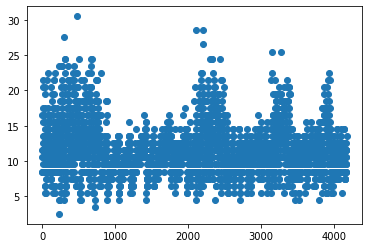

In [14]:
plt.scatter(data.index,data['Age'])
plt.show()

# Bivariate Analysis

Text(0, 0.5, 'Length')

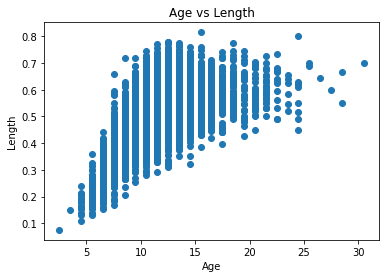

In [15]:
plt.scatter(data.Age,data.Length)
plt.title('Age vs Length')
plt.xlabel('Age')
plt.ylabel('Length')

# Multivariate Analysis

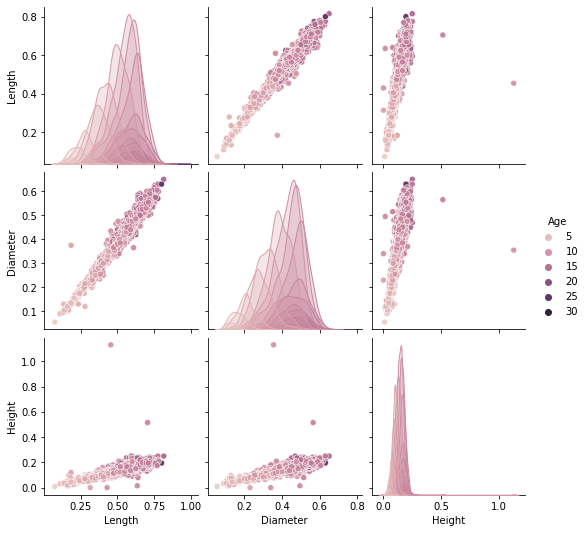

In [16]:
sns.pairplot(data[['Sex','Length','Diameter','Height','Age']],hue='Age')

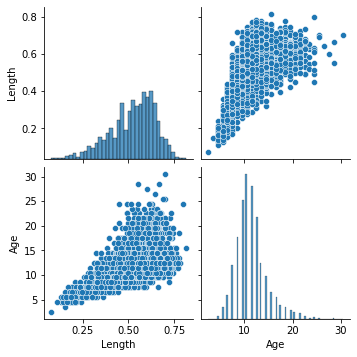

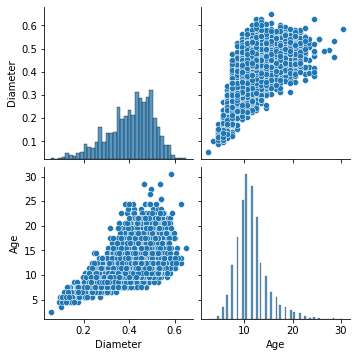

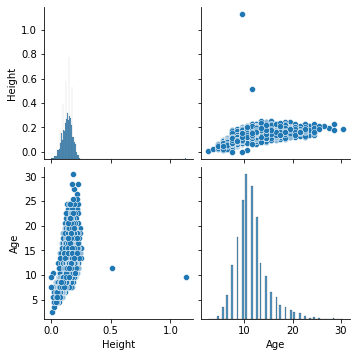

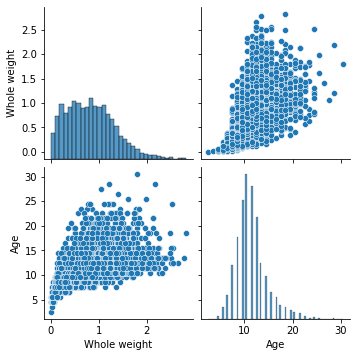

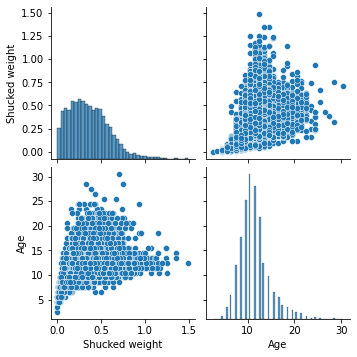

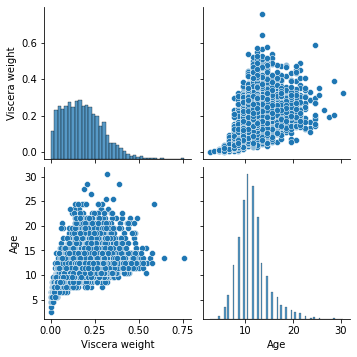

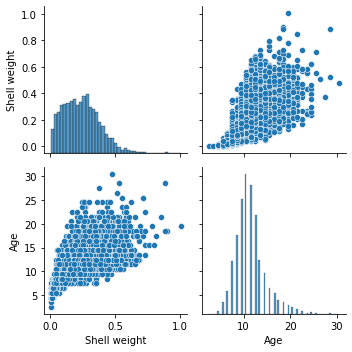

In [17]:
for i in numerical_features:
  sns.pairplot(data,vars=[i,'Age'])
plt.tight_layout()
plt.show()

# 4.Descriptive Statistics 

In [18]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# 5.Missing Value Handling

In [19]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [20]:
data.shape

(4177, 9)

In [21]:
# Unique Values
data.nunique().to_frame("unique values")

,unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
Age,28


# 6.Finding Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


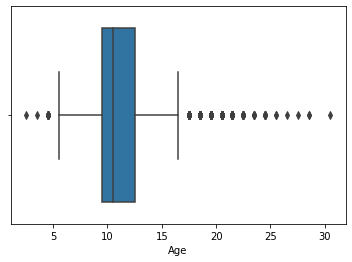

In [22]:
sns.boxplot(data.Age)

In [23]:
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)

In [24]:
IQR=q3-q1

In [25]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [26]:
upper_limit

17.0

In [27]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

In [28]:
data['Age']= np.where(data['Age']>upper_limit,17,data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


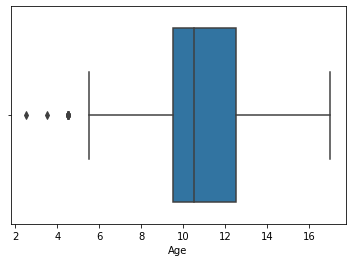

In [29]:
sns.boxplot(data.Age)

# Check for Categorical columns and perform encoding (One Hot Encoding)

In [30]:
categorical_feature

'Sex'

In [31]:
data_dummies = pd.get_dummies(data['Sex'], drop_first = True, prefix = "Sex_")
for column in data_dummies.columns:
    data[column] = data_dummies[column]

data = data.drop(columns = ['Sex'])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex__I,Sex__M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


# 8.Split Dependent And Independent Variables

In [32]:
X=data[['Length', 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight','Sex__I','Sex__M']]
Y=data['Age']

In [33]:
X=data.iloc[:, :-1].values
print(X)

[[ 0.455  0.365  0.095 ...  0.15  16.5    0.   ]
 [ 0.35   0.265  0.09  ...  0.07   8.5    0.   ]
 [ 0.53   0.42   0.135 ...  0.21  10.5    0.   ]
 ...
 [ 0.6    0.475  0.205 ...  0.308 10.5    0.   ]
 [ 0.625  0.485  0.15  ...  0.296 11.5    0.   ]
 [ 0.71   0.555  0.195 ...  0.495 13.5    0.   ]]


In [34]:
y=data.iloc[:, -1].values
print(y)

[1 1 0 ... 1 0 1]


# 9.Scale the independent Variables

In [35]:
from sklearn.preprocessing import scale

In [36]:
y=scale(y)
y

array([ 1.31667716,  1.31667716, -0.75948762, ...,  1.31667716,
       -0.75948762,  1.31667716])

# 10.Split the data into training and testing

In [37]:
response = data["Age"]
dataset = data.drop(columns="Age")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(response,dataset,test_size=0.33, random_state=42)
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2798,)
Number transactions y_train dataset:  (2798, 9)
Number transactions X_test dataset:  (1379,)
Number transactions y_test dataset:  (1379, 9)


In [38]:
x_train

1593     9.5
111     10.5
3271    17.0
1089     8.5
2918    10.5
        ... 
3444    10.5
466     13.5
3092    12.5
3772    10.5
860      7.5
Name: Age, Length: 2798, dtype: float64

In [39]:
x_train= x_train.values.reshape(-1, 1)

In [40]:
x_test= x_test.values.reshape(-1, 1)

In [41]:
y_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex__I,Sex__M
866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,0,1
1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.2450,0,1
599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.3350,0,0
1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.3800,0,0
670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.2150,0,1
...,...,...,...,...,...,...,...,...,...
601,0.385,0.315,0.110,0.2860,0.1225,0.0635,0.0835,0,0
233,0.275,0.215,0.075,0.1155,0.0485,0.0290,0.0350,1,0
2644,0.490,0.375,0.125,0.5445,0.2790,0.1150,0.1300,1,0
931,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,0,0


# 11.Building the model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

# 12.Train the model

In [44]:
model.fit(x_train,y_train)

LinearRegression()

# 13.Test the model

In [45]:
y_pred =model.predict(x_test)

In [46]:
y_pred

array([[ 0.50484421,  0.39153074,  0.13282251, ...,  0.21439192,
         0.38071538,  0.33799567],
       [ 0.47887403,  0.3695071 ,  0.1239006 , ...,  0.18141102,
         0.4583168 ,  0.30459457],
       [ 0.67365041,  0.5346844 ,  0.19081489, ...,  0.42876783,
        -0.12369383,  0.55510281],
       ...,
       [ 0.47887403,  0.3695071 ,  0.1239006 , ...,  0.18141102,
         0.4583168 ,  0.30459457],
       [ 0.42693366,  0.32545982,  0.10605679, ...,  0.1154492 ,
         0.61351963,  0.23779238],
       [ 0.40096347,  0.30343617,  0.09713489, ...,  0.08246829,
         0.69112105,  0.20439128]])

In [47]:
y_pred1=model.predict(x_train)

In [48]:
y_pred1

array([[ 0.47887403,  0.3695071 ,  0.1239006 , ...,  0.18141102,
         0.4583168 ,  0.30459457],
       [ 0.50484421,  0.39153074,  0.13282251, ...,  0.21439192,
         0.38071538,  0.33799567],
       [ 0.67365041,  0.5346844 ,  0.19081489, ...,  0.42876783,
        -0.12369383,  0.55510281],
       ...,
       [ 0.55678458,  0.43557802,  0.15066631, ...,  0.28035374,
         0.22551255,  0.40479787],
       [ 0.50484421,  0.39153074,  0.13282251, ...,  0.21439192,
         0.38071538,  0.33799567],
       [ 0.42693366,  0.32545982,  0.10605679, ...,  0.1154492 ,
         0.61351963,  0.23779238]])

# 14. Measure the performance using Metrics.

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("Test rmse : ", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

Train rmse :  0.2653477402538657
Test rmse :  0.26090464969364685


In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

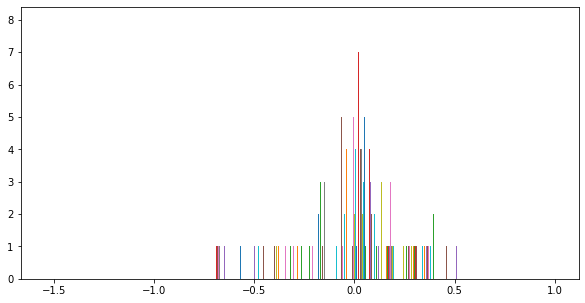

In [52]:
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()